<a href="https://colab.research.google.com/github/Landonishere/PatternFlow/blob/topic-recognition/recognition/s4565093/test_45650938.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15339, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 15339 (delta 1), reused 3 (delta 0), pack-reused 15331
Receiving objects: 100% (15339/15339), 13.93 MiB | 9.66 MiB/s, done.
Resolving deltas: 100% (10381/10381), done.


In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
!make

chmod +x *.sh


In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-10-30 05:33:34--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  23.3MB/s    in 11s     

2021-10-30 05:33:45 (21.8 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
!cp /content/gdrive/MyDrive/test.zip /content/darknet/data/

cp: cannot stat '/content/gdrive/MyDrive/test.zip': No such file or directory


In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')  # connect to my google drive

/content
Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/test.zip -d /content/darknet/data/test  # unzip train dataset

Archive:  /content/gdrive/MyDrive/test.zip
  inflating: /content/darknet/data/test/ISIC_0000003.jpg  
  inflating: /content/darknet/data/test/ISIC_0000003.txt  
  inflating: /content/darknet/data/test/ISIC_0000012.jpg  
  inflating: /content/darknet/data/test/ISIC_0000012.txt  
  inflating: /content/darknet/data/test/ISIC_0000013.jpg  
  inflating: /content/darknet/data/test/ISIC_0000013.txt  
  inflating: /content/darknet/data/test/ISIC_0000014.jpg  
  inflating: /content/darknet/data/test/ISIC_0000014.txt  
  inflating: /content/darknet/data/test/ISIC_0000015.jpg  
  inflating: /content/darknet/data/test/ISIC_0000015.txt  
  inflating: /content/darknet/data/test/ISIC_0000020.jpg  
  inflating: /content/darknet/data/test/ISIC_0000020.txt  
  inflating: /content/darknet/data/test/ISIC_0000022.jpg  
  inflating: /content/darknet/data/test/ISIC_0000022.txt  
  inflating: /content/darknet/data/test/ISIC_0000023.jpg  
  inflating: /content/darknet/data/test/ISIC_0000023.txt  
  inflating: 

In [ ]:
!cp /content/gdrive/MyDrive/yolo_v3/generate_train.py /content/darknet/
!cp /content/gdrive/MyDrive/yolo_v3/obj.names /content/darknet/data
!cp /content/gdrive/MyDrive/yolo_v3/obj.data /content/darknet/data
!cp /content/gdrive/MyDrive/yolo_v3/yolov3_custom.cfg /content/darknet/cfg

In [ ]:
!python /content/darknet/generate_train.py

In [ ]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2021-10-30 05:34:31--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  23.4MB/s    in 7.4s    

2021-10-30 05:34:39 (21.0 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



[Errno 20] Not a directory: 'darknet'
/content/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104

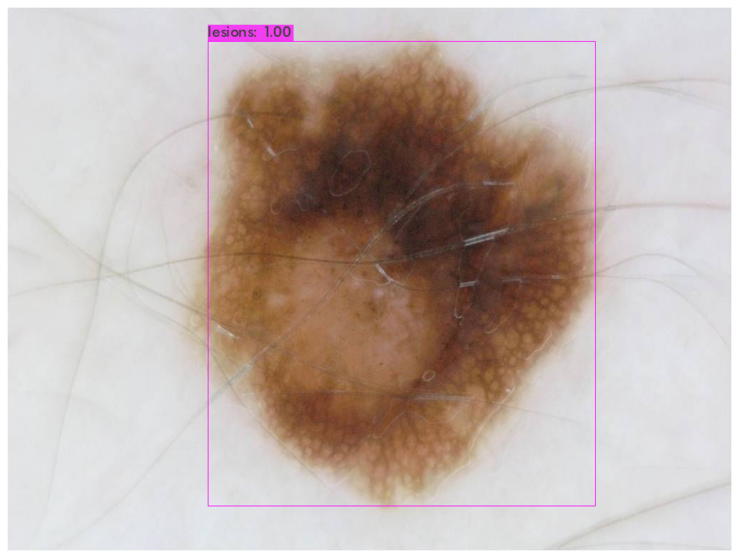

In [ ]:
%cd darknet
!./darknet detector test /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom3.cfg /content/gdrive/MyDrive/yolo_v3/backup/yolov3_custom3_last.weights /content/darknet/data/test/ISIC_0000003.jpg -thresh 0.8
imShow('predictions.jpg')

In [ ]:
!./darknet detector map /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom.cfg /content/gdrive/MyDrive/yolo_v3/backup/yolov3_custom_last.weights -points 11

/bin/bash: ./darknet detector: No such file or directory


# Using cacl_mAp.cmd to get the final results of the whole test dataset 
Just replace the (1)obj.data (2)yolov3_custom3 (3) yolov3_custom3_final.weights in cacl_mAP.cmd file.

In [ ]:
!./darknet detector map /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom3.cfg /content/gdrive/MyDrive/yolo_v3/backup/yolov3_custom3_final.weights -ext_output -dont_show </content/darknet/data/test.txt> map.txt -iou_thresh 0.5

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x

In [ ]:
!./darknet detector recall /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom3.cfg /content/gdrive/MyDrive/yolo_v3/backup/yolov3_custom3_final.weights -ext_output -dont_show </content/darknet/data/test.txt> recall.txt -iou_thresh 0.8

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x